<a href="https://colab.research.google.com/github/umais2005/DeepLearning/blob/main/Training_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 213s 1us/step


In [10]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

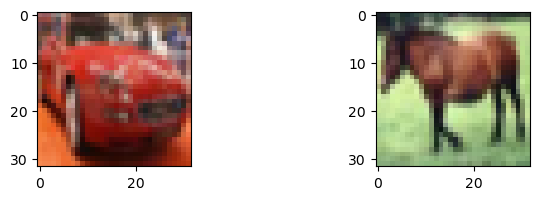

In [11]:
plt.figure(figsize=(8,2))
plt.subplot(121)
plt.imshow(X_train[5])
plt.subplot(122)
plt.imshow(X_train[7])

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

10 classes, balanced

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
def build_model(n_hidden=20, n_units=100,activation='relu', init='glorot_uniform'):
  tf.keras.backend.clear_session()
  tf.random.set_seed(42)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(32,32,3)))
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_units, activation=activation,
                                    kernel_initializer=init))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  return model

def build_and_compile_model(optimizer=tf.keras.optimizers.Adam, lr=0.001, **kwargs):
  model = build_model(**kwargs)
  model.compile(optimizer=optimizer(learning_rate=lr), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model


In [17]:
model = build_and_compile_model(activation='swish', init='he_uniform', optimizer=tf.keras.optimizers.Nadam)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
early_stopper= tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard()

In [21]:
model.fit(X_train, y_train,
          epochs=25,
          validation_split=0.2,
          callbacks= [early_stopper,tensorboard_cb])

Epoch 1/25


C:\Users\wasif\miniconda3\envs\DL_general\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 21ms/step - accuracy: 0.1655 - loss: 2.1895 - val_accuracy: 0.2764 - val_loss: 1.8982
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.2933 - loss: 1.8701 - val_accuracy: 0.3031 - val_loss: 1.8305
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.3320 - loss: 1.7978 - val_accuracy: 0.3509 - val_loss: 1.7656
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.3610 - loss: 1.7423 - val_accuracy: 0.3838 - val_loss: 1.6974
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.3916 - loss: 1.6936 - val_accuracy: 0.3967 - val_loss: 1.6715
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.4033 - loss: 1.6598 - val_accuracy: 0.3963 - val_loss: 1.6613
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.4143 - loss: 1.6344 - val_accuracy: 0.4042 - val_loss: 1.6513
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4176 - loss: 1.61

In [25]:
# lets choose ideal learning rate
# from pathlib import Path
# runindex = 0
# for runindex, lr in enumerate([0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01]):
#     logpath = Path()/"cifarlogs"/ f"run{runindex}"
#     tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=logpath)
#     model = build_and_compile_model(activation = 'swish', init='he_normal',lr=lr,optimizer=tf.keras.optimizers.Nadam)
#     model.fit(X_train, y_train, epochs=10, validation_split = 0.2, callbacks=[tensorboard_cb])


Epoch 1/10


C:\Users\wasif\miniconda3\envs\DL_general\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.1477 - loss: 2.2526 - val_accuracy: 0.2342 - val_loss: 2.0581
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.2499 - loss: 2.0026 - val_accuracy: 0.2952 - val_loss: 1.9196
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3063 - loss: 1.8817 - val_accuracy: 0.3374 - val_loss: 1.8421
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3393 - loss: 1.8156 - val_accuracy: 0.3582 - val_loss: 1.7970
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.3569 - loss: 1.7731 - val_accuracy: 0.3682 - val_loss: 1.7670
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3681 - loss: 1.7411 - val_accuracy: 0.3773 - val_loss: 1.7445
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3783 - loss: 1.7145 - val_accuracy: 0.3866 - val_loss: 1.7260
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3888 - loss: 1.69

In [26]:
print("d")

d


In [27]:
%tensorboard --logdir=./cifarlogs

best learning rate is between 1e-5 and 3e-5 i will comment out above code